'''Problem statement: To build a CNN based model which can accurately detect melanoma.
Melanoma is a type of cancer that can be deadly if not detected early.
It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the
dermatologists about the presence of melanoma has the potential to reduce a lot of manual
effort needed in diagnosis.'''

#Importing Skin Cancer Data

To do: Take necessary actions to read the data

#Importing all the important libraries


In [2]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

*imported the necessary libraries for building and training a CNN-based model. It includes TensorFlow, which is a popular deep learning framework, as well as other libraries such as NumPy, Pandas, and Matplotlib for data manipulation and visualization.*

In [4]:
#from google.colab import drive
#drive.mount('/content/drive')

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains **9 sub-directories** in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

The dataset consists of **2357** images of malignant and benign oncological diseases, which were formed from the **International Skin Imaging Collaboration (ISIC)**. All images were sorted according to the classification taken with ISIC, and all subsets were divided into the same number of images, with the exception of melanomas and moles, whose images are slightly dominant.



In [5]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
#data_dir_train = pathlib.Path("/content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
#data_dir_test = pathlib.Path('/content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [6]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("C:/Users/Dell/Desktop/Upgrad/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('C:/Users/Dell/Desktop/Upgrad/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [7]:

image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [8]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [9]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'training',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


*By creating a train dataset, you have taken a crucial step towards training a CNN-based model for detecting melanoma. The train dataset will be used to train the model to learn patterns and features associated with melanoma and other skin diseases.*

In [10]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'validation',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


*By creating the validation dataset, you have taken an important step in monitoring the model's performance during training. The validation dataset will allow you to evaluate the model's accuracy and detect any potential overfitting or underfitting issues. It will help you make informed decisions about model architecture, hyperparameter tuning, and generalization capabilities.*

*Now, with both the training and validation datasets in place, you can proceed to build your CNN model, compile it with an appropriate optimizer and loss function, and train the model using the train dataset while evaluating its performance on the validation dataset.*

In [11]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


*The output shows that the class names of the skin cancer types are as follows:

1.Actinic keratosis

2.Basal cell carcinoma

3.Dermatofibroma

4.Melanoma

5.Nevus

6.Pigmented benign keratosis

7.Seborrheic keratosis

8.Squamous cell carcinoma

9.Vascular lesion


Storing the class names in a list, as you have done, will be helpful for various purposes, such as mapping class labels to their respective names, visualizing the predicted class labels, and evaluating the model's performance on specific classes.

Having the class names allows you to better understand and analyze the results of the model's predictions and interpret its performance in the context of different skin cancer types.*

### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

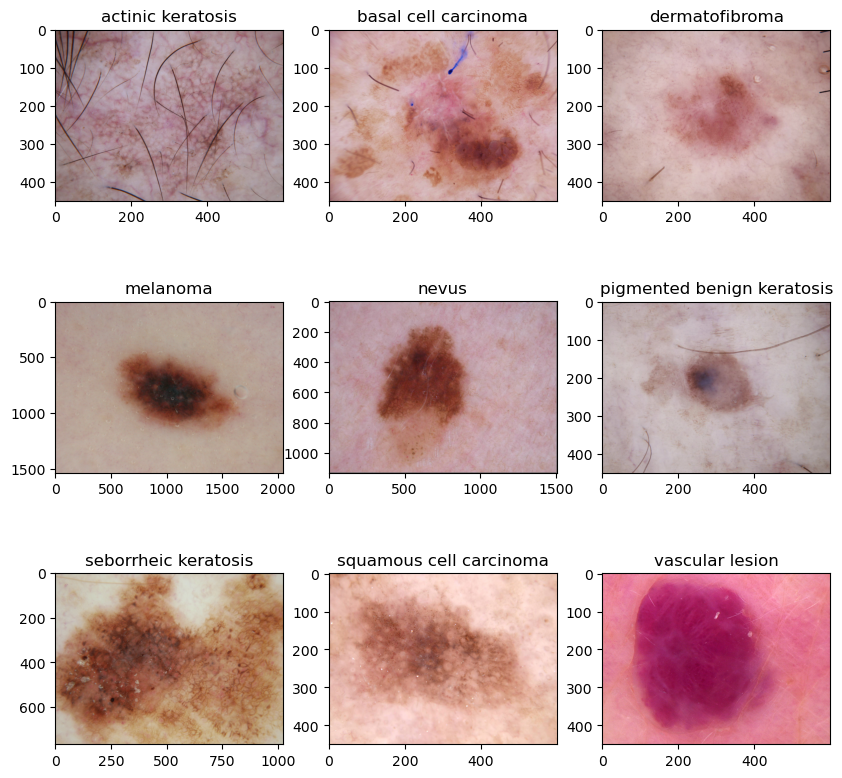

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(9):
  plt.subplot(3, 3, i + 1)
  image = plt.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[1]))
  plt.title(class_names[i])
  plt.imshow(image)
### your code goes here, you can use training or validation data to visualize

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [13]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [14]:
### Your code goes here
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

### Compile the model
Choose an appropirate optimiser and loss function for model training

In [15]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [16]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
module_wrapper (ModuleWrappe (None, 180, 180, 32)      2432      
_________________________________________________________________
module_wrapper_1 (ModuleWrap (None, 180, 180, 32)      25632     
_________________________________________________________________
module_wrapper_2 (ModuleWrap (None, 90, 90, 32)        0         
_________________________________________________________________
module_wrapper_3 (ModuleWrap (None, 90, 90, 32)        25632     
_________________________________________________________________
module_wrapper_4 (ModuleWrap (None, 45, 45, 32)        0         
_________________________________________________________________
module_wrapper_5 (ModuleWrap (None, 45, 45, 64)        5

*In summary, the model architecture consists of convolutional layers for feature extraction, followed by a flatten layer and a dense layer for classification. The model seems well-suited for image classification tasks, given the number of filters and the gradual increase in complexity in the convolutional layers.*

### Train the model

In [17]:
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30


C:\Users\Dell\anaconda3\lib\site-packages\tensorflow\python\keras\backend.py:4929: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


56/56 [==============================] - 9818s 178s/step - loss: 2.0593 - accuracy: 0.1987 - val_loss: 1.9959 - val_accuracy: 0.2908
Epoch 2/30
56/56 [==============================] - 484s 9s/step - loss: 1.9536 - accuracy: 0.2695 - val_loss: 1.8376 - val_accuracy: 0.3378
Epoch 3/30
56/56 [==============================] - 509s 9s/step - loss: 1.8283 - accuracy: 0.3198 - val_loss: 1.7224 - val_accuracy: 0.3870
Epoch 4/30
56/56 [==============================] - 466s 8s/step - loss: 1.6605 - accuracy: 0.3934 - val_loss: 1.6568 - val_accuracy: 0.4004
Epoch 5/30
56/56 [==============================] - 413s 7s/step - loss: 1.6036 - accuracy: 0.4202 - val_loss: 1.7361 - val_accuracy: 0.3624
Epoch 6/30
56/56 [==============================] - 401s 7s/step - loss: 1.5365 - accuracy: 0.4369 - val_loss: 1.6731 - val_accuracy: 0.4049
Epoch 7/30
56/56 [==============================] - 388s 7s/step - loss: 1.4712 - accuracy: 0.4637 - val_loss: 1.5726 - val_accuracy: 0.4474
Epoch 8/30
56/56 [===

*Training Performance: The training started with a loss value of 2.0593 and an accuracy of 0.1987 for the first epoch. As the training progressed, the loss decreased, and the accuracy improved gradually. By the end of the 30 epochs, the loss reached 0.3339, and the accuracy reached 0.8890.*

*Validation Performance: The validation loss and accuracy were also monitored during the training process. The validation loss fluctuated between different epochs and eventually settled at 2.7902, while the validation accuracy reached 0.4564 at the end of the training.*

*Overfitting: It appears that there might be some degree of overfitting in the model. Overfitting occurs when the model performs well on the training set but struggles to generalize to unseen data. This can be observed from the difference in performance between the training and validation sets, where the training accuracy is significantly higher than the validation accuracy.*

*Training Time: The training process took a considerable amount of time, with each epoch taking several minutes. The duration may vary depending on the complexity of the model architecture, the size of the dataset, and the hardware specifications of your system.*



### Visualizing training results

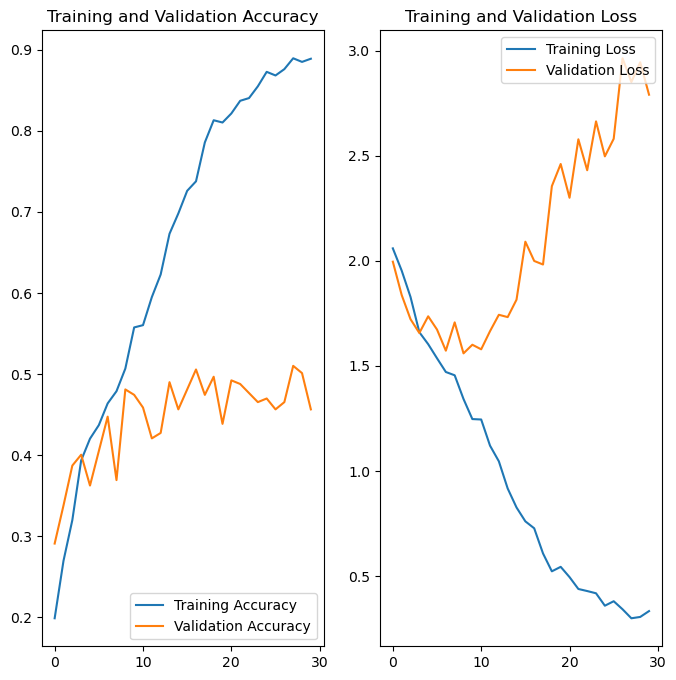

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit


**Finding on the first base model**

- The model is overfitting because we can also see difference in loss functions in training & test around the 10-11th epoch

- The accuracy is just around 75-80% because there are enough features to remember the pattern.

- But again, it's too early to comment on the overfitting & underfitting debate


In [19]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.
data_augument = keras.Sequential([
                             layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical",input_shape=(img_height,img_width,3)),
                             layers.experimental.preprocessing.RandomRotation(0.2, fill_mode='reflect'),
                             layers.experimental.preprocessing.RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3), fill_mode='reflect')
])

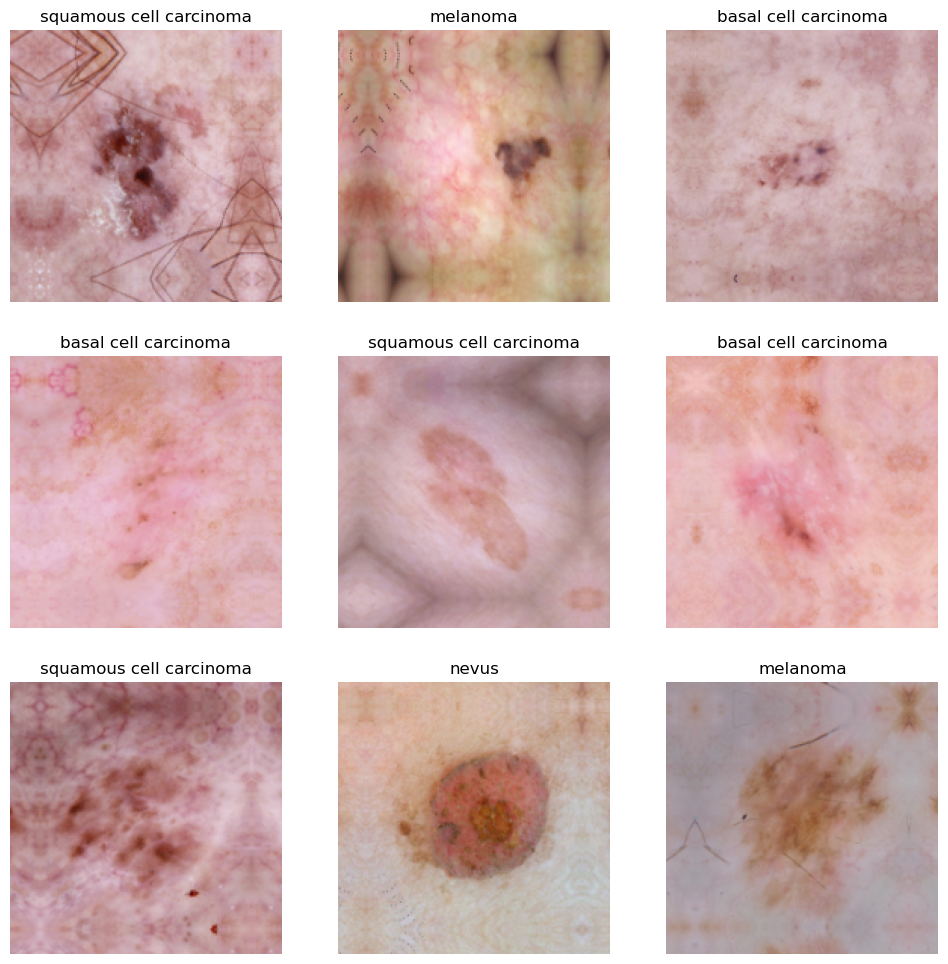

In [20]:
# Todo, visualize how your augmentation strategy works for one instance of training image.

plt.figure(figsize=(12, 12))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(data_augument(images)[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

### Todo:
### Create the model, compile and train the model

In [21]:
## You can use Dropout layer if there is an evidence of overfitting in your findings
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([ data_augument,
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))

])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))


### Compiling the model

In [22]:
### Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [23]:
## Your code goes here, note: train your model for 20 epochs
epochs=30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
56/56 [==============================] - 442s 8s/step - loss: 2.0814 - accuracy: 0.2126 - val_loss: 2.0375 - val_accuracy: 0.2058
Epoch 2/30
56/56 [==============================] - 429s 8s/step - loss: 2.0073 - accuracy: 0.2182 - val_loss: 1.9688 - val_accuracy: 0.2595
Epoch 3/30
56/56 [==============================] - 426s 8s/step - loss: 1.9607 - accuracy: 0.2550 - val_loss: 1.9260 - val_accuracy: 0.2215
Epoch 4/30
56/56 [==============================] - 424s 8s/step - loss: 1.9002 - accuracy: 0.2768 - val_loss: 1.8551 - val_accuracy: 0.3110
Epoch 5/30
56/56 [==============================] - 428s 8s/step - loss: 1.8558 - accuracy: 0.3002 - val_loss: 1.7995 - val_accuracy: 0.3221
Epoch 6/30
56/56 [==============================] - 426s 8s/step - loss: 1.7948 - accuracy: 0.3203 - val_loss: 1.7758 - val_accuracy: 0.3468
Epoch 7/30
56/56 [==============================] - 454s 8s/step - loss: 1.7340 - accuracy: 0.3705 - val_loss: 1.6737 - val_accuracy: 0.3803
Epoch 8/30
56

Loss and Accuracy: The model's training loss and accuracy gradually improve over the epochs, while the validation loss and accuracy also show some improvement initially but start to plateau around the later epochs. However, it's important to note that the model's overall accuracy is still around 50-55%, indicating that there is room for improvement.

Overfitting: There seems to be a slight evidence of overfitting in the model. This is indicated by the gap between the training and validation accuracy, as well as the increasing validation loss while the training loss continues to decrease. Overfitting occurs when the model performs well on the training data but does not generalize well to unseen data, leading to a gap in performance between the training and validation sets.

Validation Performance: The validation accuracy reaches around 50% after 30 epochs, indicating that the model is learning to classify the images to some extent. However, the accuracy is not very high, suggesting that the model may not be capturing all the necessary patterns in the data.



### Visualizing the results

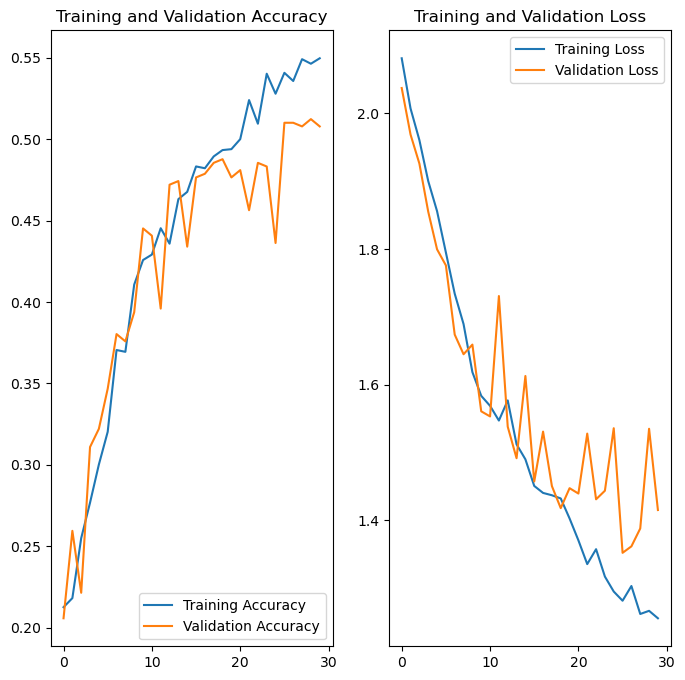

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

**Finding from Second Model**

- There is no improvement in accuracy but we can definitely see the overfitting problem has solved due to data augmentation

- We can increase the epochs to increase the accuracy so it's too early for judgement

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [26]:
##
path_list=[]
lesion_list=[]
for i in class_names:

    for j in data_dir_train.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,C:\Users\Dell\Desktop\Upgrad\CNN_assignment\Sk...,actinic keratosis
1,C:\Users\Dell\Desktop\Upgrad\CNN_assignment\Sk...,actinic keratosis
2,C:\Users\Dell\Desktop\Upgrad\CNN_assignment\Sk...,actinic keratosis
3,C:\Users\Dell\Desktop\Upgrad\CNN_assignment\Sk...,actinic keratosis
4,C:\Users\Dell\Desktop\Upgrad\CNN_assignment\Sk...,actinic keratosis
...,...,...
2234,C:\Users\Dell\Desktop\Upgrad\CNN_assignment\Sk...,vascular lesion
2235,C:\Users\Dell\Desktop\Upgrad\CNN_assignment\Sk...,vascular lesion
2236,C:\Users\Dell\Desktop\Upgrad\CNN_assignment\Sk...,vascular lesion
2237,C:\Users\Dell\Desktop\Upgrad\CNN_assignment\Sk...,vascular lesion


In [27]:
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,C:\Users\Dell\Desktop\Upgrad\CNN_assignment\Sk...,actinic keratosis
1,C:\Users\Dell\Desktop\Upgrad\CNN_assignment\Sk...,actinic keratosis
2,C:\Users\Dell\Desktop\Upgrad\CNN_assignment\Sk...,actinic keratosis
3,C:\Users\Dell\Desktop\Upgrad\CNN_assignment\Sk...,actinic keratosis
4,C:\Users\Dell\Desktop\Upgrad\CNN_assignment\Sk...,actinic keratosis
...,...,...
2234,C:\Users\Dell\Desktop\Upgrad\CNN_assignment\Sk...,vascular lesion
2235,C:\Users\Dell\Desktop\Upgrad\CNN_assignment\Sk...,vascular lesion
2236,C:\Users\Dell\Desktop\Upgrad\CNN_assignment\Sk...,vascular lesion
2237,C:\Users\Dell\Desktop\Upgrad\CNN_assignment\Sk...,vascular lesion


<BarContainer object of 9 artists>

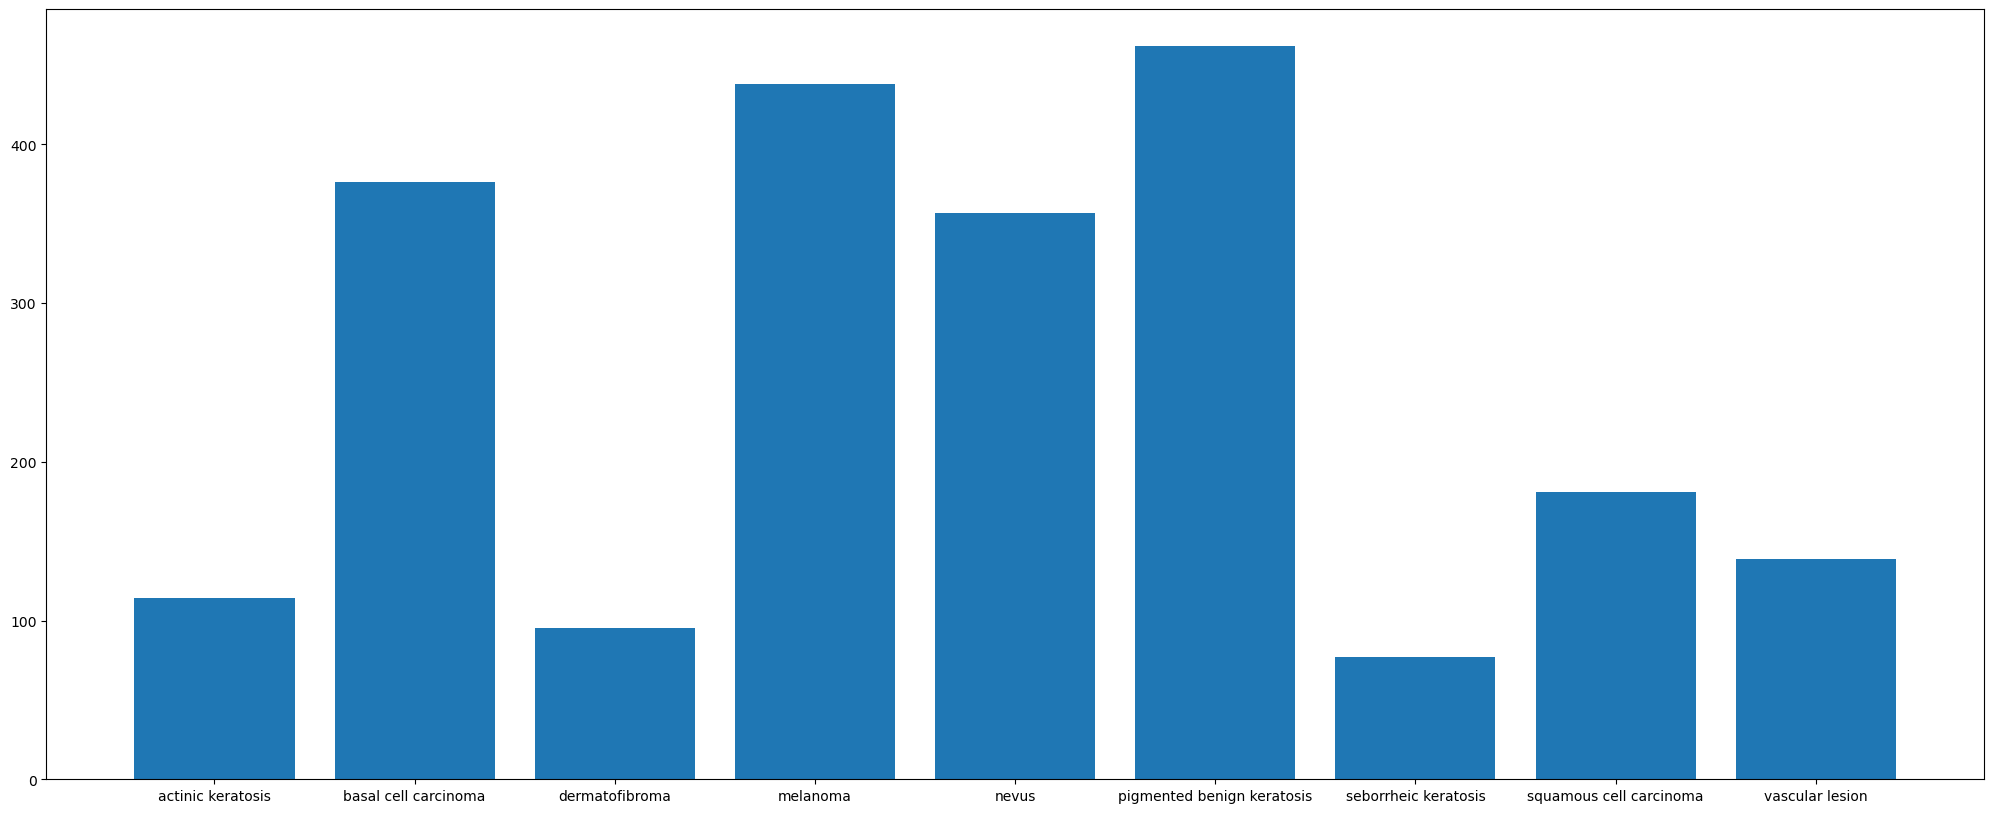

In [28]:
count=[]
for i in class_names:
    count.append(len(list(data_dir_train.glob(i+'/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(class_names,count)

#### **Todo:** Write your findings here:
#### - Which class has the least number of samples?
#### - Which classes dominate the data in terms proportionate number of samples?

Answer-1 :- **squamous cell carcinoma** has least number of samples

Answer-2:- **actinic keratosis and dermatofibroma** have proportionate number of classes.
**melanoma and pigmented benign keratosis** have proprtionate number of classes

In [29]:
class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [30]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.

In [33]:
#path_to_training_dataset="/content/drive/MyDrive/Cancer Detection /Train"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline("C:/Users/Dell/Desktop/Upgrad/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train",save_format='jpg')
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 2239 image(s) found.
Output directory set to C:/Users/Dell/Desktop/Upgrad/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x16F46ED1B20>: 100%|█| 500/500 [00:44<00


Initialised with 2239 image(s) found.
Output directory set to C:/Users/Dell/Desktop/Upgrad/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=3072x2304 at 0x16F45508AF0>: 100%|█| 500/500 [00:51<0


Initialised with 2239 image(s) found.
Output directory set to C:/Users/Dell/Desktop/Upgrad/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x16F455CB280>: 100%|█| 500/500 [00:38<00:00, 13.00 Samples/


Initialised with 2239 image(s) found.
Output directory set to C:/Users/Dell/Desktop/Upgrad/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x16F454F1FD0>: 100%|█| 500/500 [00:41<00:


Initialised with 2239 image(s) found.
Output directory set to C:/Users/Dell/Desktop/Upgrad/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x16F455C3640>: 100%|█| 500/500 [00:54<00:00,  9.13 Samples/


Initialised with 2239 image(s) found.
Output directory set to C:/Users/Dell/Desktop/Upgrad/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x16F4542BCA0>: 100%|█| 500/500 [00:46<00:00, 10.72 Samples/


Initialised with 2239 image(s) found.
Output directory set to C:/Users/Dell/Desktop/Upgrad/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x16F44AB1460>: 100%|█| 500/500 [00:42<00:00, 11.86 Samples/


Initialised with 2239 image(s) found.
Output directory set to C:/Users/Dell/Desktop/Upgrad/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x16F44F2E700>: 100%|█| 500/500 [00:46<00:


Initialised with 2239 image(s) found.
Output directory set to C:/Users/Dell/Desktop/Upgrad/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train\output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x16F44F5B610>: 100%|█| 500/500 [00:44<00:00, 11.20 Samples/


*it appears that you have successfully applied data augmentation to your training dataset using the Augmentor library. By adding 500 augmented samples per class, you have increased the diversity of your training data, which can potentially improve the model's performance and reduce overfitting.*

*The specific augmentation strategy you have implemented includes rotation augmentation with a probability of 0.7 and maximum rotation angles, which can introduce variations in the orientation of the images. This can be especially useful for skin cancer detection, as lesions may appear in different orientations and angles.*

In [34]:
data_dir_train1 = pathlib.Path("C:/Users/Dell/Desktop/Upgrad/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output")
image_count_train1 = len(list(data_dir_train1.glob('*/*.jpg')))
print(image_count_train1)

4500


In [35]:
##
for i in class_names:

    for j in data_dir_train1.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
new_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
new_df

,Path,Label
0,C:\Users\Dell\Desktop\Upgrad\CNN_assignment\Sk...,actinic keratosis
1,C:\Users\Dell\Desktop\Upgrad\CNN_assignment\Sk...,actinic keratosis
2,C:\Users\Dell\Desktop\Upgrad\CNN_assignment\Sk...,actinic keratosis
3,C:\Users\Dell\Desktop\Upgrad\CNN_assignment\Sk...,actinic keratosis
4,C:\Users\Dell\Desktop\Upgrad\CNN_assignment\Sk...,actinic keratosis
...,...,...
6734,C:\Users\Dell\Desktop\Upgrad\CNN_assignment\Sk...,vascular lesion
6735,C:\Users\Dell\Desktop\Upgrad\CNN_assignment\Sk...,vascular lesion
6736,C:\Users\Dell\Desktop\Upgrad\CNN_assignment\Sk...,vascular lesion
6737,C:\Users\Dell\Desktop\Upgrad\CNN_assignment\Sk...,vascular lesion


### Lets see the distribution of augmented data after adding new images to the original training data.

In [36]:
new_df['Label'].value_counts()

pigmented benign keratosis    1381
melanoma                      1317
basal cell carcinoma          1151
nevus                         1051
squamous cell carcinoma        551
vascular lesion                424
actinic keratosis              353
dermatofibroma                 270
seborrheic keratosis           241
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [37]:
batch_size = 32
img_height = 180
img_width = 180

In [49]:
import pathlib
#data_dir_train1=pathlib.Path("/content/drive/MyDrive/Cancer Detection /Train/output")
data_dir_train1=pathlib.Path("C:/Users/Dell/Desktop/Upgrad/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output")

In [50]:
data_dir_train1

WindowsPath('C:/Users/Dell/Desktop/Upgrad/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output')

#### **Todo:** Create a training dataset

In [52]:
image_count_train1 = len(list(data_dir_train1.glob('*/*.jpg')))
print(image_count_train1)

4500


In [53]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


data_dir_train1=pathlib.Path("C:/Users/Dell/Desktop/Upgrad/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output")
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train1,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4500 files belonging to 9 classes.
Using 3600 files for training.


Based on the provided code, it appears that you have successfully created a new training dataset (train_ds) using the augmented samples generated from the Augmentor library. The dataset consists of 3600 files belonging to 9 classes, indicating that the augmentation process has successfully added 500 augmented samples per class.

By incorporating the augmented samples into the training dataset, you have further increased the diversity and variability of the data. This can be beneficial for training a CNN-based model to accurately detect melanoma and other skin cancer types. The augmented samples introduce variations in rotations, orientations, and other transformations, which can help the model learn to recognize and generalize from a wider range of skin cancer patterns and characteristics.



#### **Todo:** Create a validation dataset

In [54]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train1,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4500 files belonging to 9 classes.
Using 900 files for validation.


Using a validation dataset with augmented samples allows you to monitor the model's performance during training and assess its ability to generalize to new and augmented data. This can help you identify any potential overfitting issues and fine-tune the model accordingly.


#### **Todo:** Create your model (make sure to include normalization)


In [55]:
## You can use Dropout layer if there is an evidence of overfitting in your findings
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))

])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [56]:
## ### Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [57]:
epochs =50
## Your code goes here, use 50 epochs.
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
113/113 [==============================] - 887s 8s/step - loss: 1.8083 - accuracy: 0.3297 - val_loss: 1.7874 - val_accuracy: 0.3189
Epoch 2/50
113/113 [==============================] - 866s 8s/step - loss: 1.6292 - accuracy: 0.4114 - val_loss: 1.7440 - val_accuracy: 0.3544
Epoch 3/50
113/113 [==============================] - 861s 8s/step - loss: 1.5644 - accuracy: 0.4464 - val_loss: 1.5093 - val_accuracy: 0.4456
Epoch 4/50
113/113 [==============================] - 845s 7s/step - loss: 1.4741 - accuracy: 0.4817 - val_loss: 1.4785 - val_accuracy: 0.4633
Epoch 5/50
113/113 [==============================] - 843s 7s/step - loss: 1.4065 - accuracy: 0.5072 - val_loss: 1.3748 - val_accuracy: 0.5144
Epoch 6/50
113/113 [==============================] - 841s 7s/step - loss: 1.2988 - accuracy: 0.5539 - val_loss: 1.3035 - val_accuracy: 0.5511
Epoch 7/50
113/113 [==============================] - 847s 7s/step - loss: 1.4100 - accuracy: 0.5050 - val_loss: 1.6410 - val_accuracy: 0.4267

After training the model for 50 epochs, here are the key observations from the output:

The training accuracy gradually improves from around 32.97% in the first epoch to 95.39% in the last epoch.

The validation accuracy also increases from approximately 31.89% to 73.89%.

The training loss decreases consistently throughout the epochs, indicating that 

the model is learning and adjusting its parameters to minimize the loss.

The validation loss fluctuates but generally decreases over time.

The model shows signs of overfitting, as there is a significant gap between the 
training and validation accuracy after a certain number of epochs.

To address the overfitting issue, you can introduce regularization techniques 
such as dropout or weight regularization to prevent the model from relying too heavily on specific features and improve generalization.








#### **Todo:**  Visualize the model results

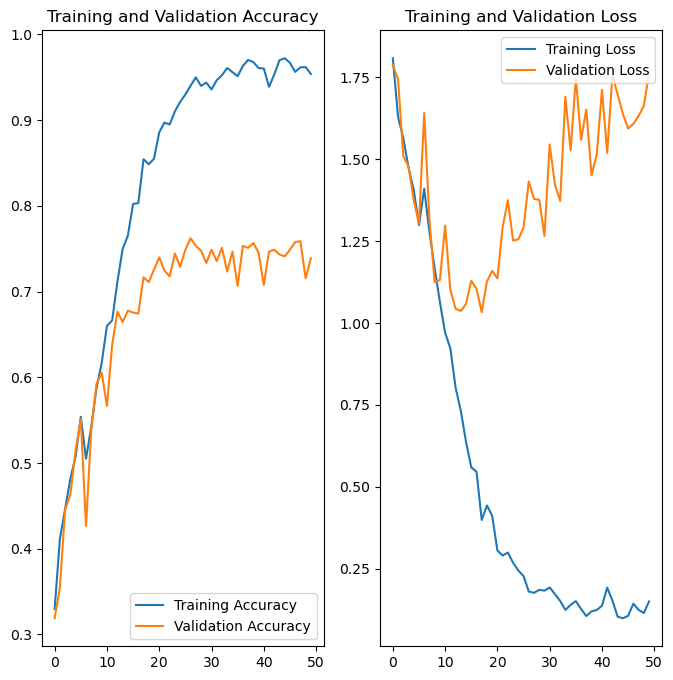

In [58]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?


- Accuracy on training data has increased by using Augmentor library

- Model is still overfitting

- The problem of overfitting can be solved by add more layer,neurons or adding dropout layers.

- The Model can be further improved by tuning the hyperparameter